<a href="https://colab.research.google.com/github/Avinash10000/SARBnet/blob/main/SARBnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Instructions for the code



1. **Mount Gdrive**
2. **Download Imports**
3. **Download Dataset From Github** - Link: 
4. **Create Necessary Files**
5. **Preprocess Data**
6. **Choose and Build the Desired Model**- there are three to chose from(AlexNet, SarahNet or a CNN(convolutional neural network). We used the CNN)
7. **Fitting the Model**( essentially training the model)
8. **Testing the Model**


In [ ]:
# Mount local drive directory
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Imports

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.python import keras
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, ZeroPadding2D
from keras.layers.merge import concatenate
from IPython.display import clear_output
from keras.optimizers import RMSprop

from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

from keras.callbacks import CSVLogger

!pip install livelossplot
from livelossplot import PlotLossesKeras

# Download the Dataset

In [ ]:
# change the strings to your own specific file path requirements
import os
BASE_DIR = os.path.join('/content','gdrive','My Drive','Trash_Net','compostnet-master','compostnet-dataset-resized')

!ls 
# Essential parameters
 
IMAGE_WIDTH, IMAGE_HEIGHT = 400, 300
EPOCHS = 20
BATCH_SIZE = 8

gdrive	sample_data


#Creating Necessary Files

In [ ]:
''' these files are essential for the code to work properly'''
DATA_DIR = BASE_DIR+"/image"
path=os.path.join(BASE_DIR,DATA_DIR)
#os.mkdir(path)
os.chdir(path)
!ls
''' CREATE THESE NEXT 4 FILES EVERY  TIME YOU UPLOAD GDIRVE(IF ITS ALREADY MADE THEN JUST MAKE THE VARIABLE EQUAL THE PATH'''
TRAINING_LOGS_FILE="/tmp/training_logs.csv"
open(TRAINING_LOGS_FILE, 'w+')
MODEL_SUMMARY_FILE ="/tmp/model_summary.txt"
open(MODEL_SUMMARY_FILE, 'w+')
TEST_FILE = "/tmp/test_file.txt"
MODEL_FILE = "/tmp/model.h5"
open(MODEL_FILE,'w+')
training_data_dir  = 'train/'
test_data_dir = 'test/'
#training_data_dir  = os.mkdir('train/')
#test_data_dir = os.mkdir('test/')

model_plot.png	test  train  training.log


# Preprocess the Data


## Data Augemntation and Preparation

In [ ]:
# Data augmentation
training_data_generator = ImageDataGenerator(
  rescale = 1./255,
  validation_split=0.3)
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

#\ Data Preparation
training_generator = training_data_generator.flow_from_directory(
  training_data_dir,
  target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
  batch_size = BATCH_SIZE,
  class_mode='categorical',
  )
validation_generator = training_data_generator.flow_from_directory(
  training_data_dir,
  target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
  batch_size = BATCH_SIZE,
  class_mode='categorical',
  subset='validation')
test_generator = test_data_generator.flow_from_directory(
  test_data_dir,
  target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
  color_mode="rgb",
  batch_size = 1,
  class_mode="categorical",
  shuffle=True)

Found 2349 images belonging to 7 classes.
Found 702 images belonging to 7 classes.
Found 602 images belonging to 7 classes.


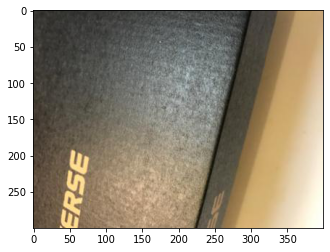

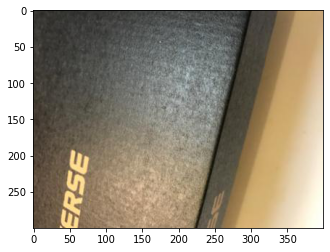

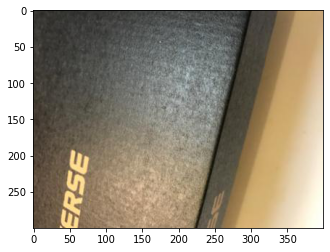

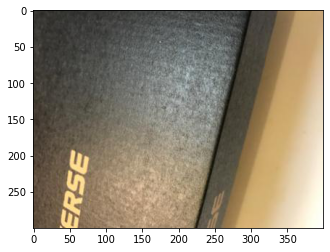

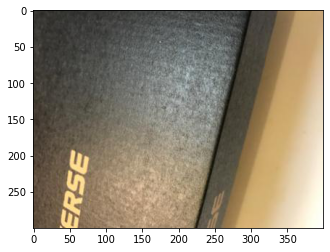

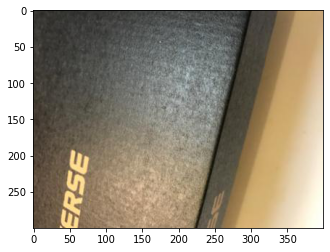

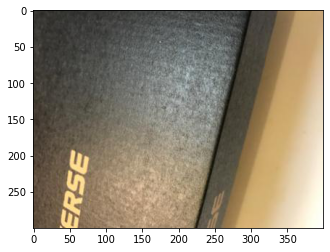

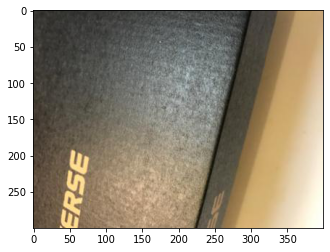

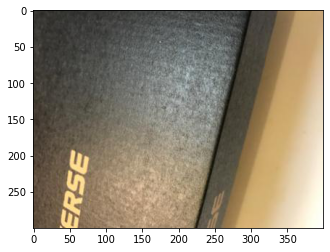

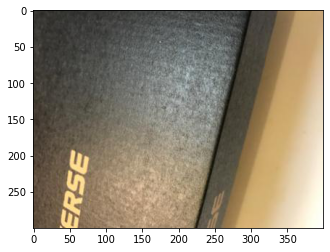

In [ ]:
img = load_img('train/cardboard/cardboard81.jpg')
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in training_data_generator.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(array_to_img(batch[0]))
  i += 1
  if i % 10 == 0:
    break

# The Model

## CNN - we used this

In [ ]:
def build_2convolutional_layer_model(width, height, layers):
  """ Builds a x3 CNN and add details later
      https://machinelearningmastery.com/keras-functional-api-deep-learning/
  """
  
  input = Input(shape=(width, height, layers))
  
  # first feature extractor
  conv1 = Conv2D(32, kernel_size=3, activation='relu')(input)
  conv2 = Conv2D(32, kernel_size=3, activation='relu')(conv1)
  pool1 = MaxPooling2D(pool_size=(2,2))(conv2)
  
  conv3 = Conv2D(64, 3, 3, activation='relu')(pool1)
  conv4 = Conv2D(64, 3, 3, activation='relu')(conv3)
  pool2 = MaxPooling2D(pool_size=(2,2))(conv4)
  
  conv5 = Conv2D(128, 3, 3, activation='relu')(pool2)
  conv6 = Conv2D(128, 3, 3, activation='relu')(conv3)
  pool3 = MaxPooling2D(pool_size=(2,2))(conv6)
  
  conv7 = Conv2D(256, 3, 3, activation='relu')(pool3)
  conv8 = Conv2D(256, 3, 3, activation='relu')(conv3)
  pool4 = MaxPooling2D(pool_size=(2,2))(conv8)
  
  flat = Flatten()(pool4)
  hidden1 = Dense(256, activation='relu')(flat)
  drop1 = Dropout(0.5)(hidden1)
  
  hidden2= Dense(256, activation='relu')(drop1)
  drop2 = Dropout(0.5)(hidden2)
  
  
  # prediction output
  output = Dense(7, activation='softmax')(drop2)
  
  model = Model(inputs=input, outputs=output)
  return model

 Alex Net Model

In [ ]:
def build_alex_net(width, height, layers):
  """ https://github.com/dhruvramani/keras-alexnet/blob/master/alexnet.py
  """
  
  input = Input(shape=(width, height, layers))
  
  # first convolution layer
  conv1 = Conv2D(64, 11, strides=4)(input)
  zeroPad1 = ZeroPadding2D(2)(conv1)
  active1 = Activation('relu')(zeroPad1)
  pool1 = MaxPooling2D(pool_size=3, strides=2)(active1)
  
  conv2 = Conv2D(192, 5)(pool1)
  zeroPad2 = ZeroPadding2D(2)(conv2)
  active2 = Activation('relu')(zeroPad2)
  pool2 = MaxPooling2D(pool_size=3, strides=2)(active2)
  
  conv3 = Conv2D(384, 3)(pool2)
  zeroPad3 = ZeroPadding2D(1)(conv3)
  active3 = Activation('relu')(zeroPad3)
  
  conv4 = Conv2D(256, 3)(active3)
  zeroPad4 = ZeroPadding2D(1)(conv4)
  active4 = Activation('relu')(zeroPad4)
  pool3 = MaxPooling2D(pool_size=3, strides=2)(active4)

  flat1 = Flatten()(pool3)
  drop1 = Dropout(0.5)(flat1)
  dense1 = Dense(4096, input_shape=(6 * 6 * 256, ))(drop1)
  active5 = Activation('relu')(dense1)
  drop2 = Dropout(0.5)(active5)
  dense2 = Dense(4096)(drop2)
  active6 =Activation('relu')(dense2)
  dense3 = Dense(7)(active6)
  active7 = Activation('softmax')(dense3)

  model = Model(inputs=input, outputs=active7)
  return model
  

##  Sarah Model

In [ ]:
def build_sarah_model(width, height, layers):
  """ yes
  """
  
  input = Input(shape=(width, height, layers))
  
  # first convolution layer
  conv1 = Conv2D(32, kernel_size=(3,3), activation='relu')(input)
  pool1 = MaxPooling2D(pool_size=(2,2))(conv1)
  drop1 = Dropout(0.3)(pool1)
  
  # second convolution layer
  conv2 = Conv2D(64, kernel_size=(3,3), activation='relu')(drop1)
  pool2 = MaxPooling2D(pool_size=(2,2))(conv2)
  drop2 = Dropout(0.3)(pool2)
  
  # third convolution layer
  conv3 = Conv2D(128, kernel_size=(3,3), activation='relu')(drop2)
  drop3 = Dropout(0.4)(conv3)
  flat3 = Flatten()(drop3)
  
  # dense layers
  dense1 = Dense(128, activation='relu')(flat3)
  drop4 = Dropout(0.3)(dense1)
  dense2 = Dense(7, activation='softmax')(drop4)
  
  return Model(inputs=input, outputs=dense2)

#Building the Model

In [ ]:

# 287,731,009
#model = build_sarah_model(IMAGE_WIDTH, IMAGE_HEIGHT, 3)
#model = build_alex_net(IMAGE_WIDTH, IMAGE_HEIGHT, 3)

#
# TF 2.x
# - https://github.com/huan/tensorflow-handbook-tpu/pull/4
#
#tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
#print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])

#tf.config.experimental_connect_to_cluster(tpu)
#tf.tpu.experimental.initialize_tpu_system(tpu)

#strategy = tf.distribute.experimental.TPUStrategy(tpu)
#print("REPLICAS: ", strategy.num_replicas_in_sync)

#
'''Create model with TPU strategy'''
#
#with strategy.scope():
  
#)
model = build_2convolutional_layer_model(IMAGE_WIDTH, IMAGE_HEIGHT, 3)
from keras.optimizers import Adam
model.compile(loss = 'categorical_crossentropy', optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),metrics=['categorical_accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 400, 300, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 398, 298, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 396, 296, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 198, 148, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 66, 49, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 22, 16, 256)       147712    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 8, 256)        0     

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
from IPython.display import Image
Image(retina=True, filename='model_plot.png')
!ls
from google.colab import files
files.download('model_plot.png') 

model_plot.png	test  train  training.log


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Fitting the Model

In [ ]:
# updatable plot
# a minimal example (sort of)

class PlotLosses(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

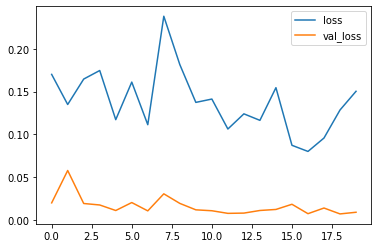

In [ ]:

model.fit(
  training_generator,
  steps_per_epoch=len(training_generator.filenames) // BATCH_SIZE,
  epochs=EPOCHS,
  validation_data=validation_generator,
  validation_steps=len(validation_generator.filenames) // BATCH_SIZE,
  callbacks=[plot_losses,keras.callbacks.CSVLogger(TRAINING_LOGS_FILE,
                                         append=False,
                                         separator=";") ],
  verbose=1)

model.save_weights(MODEL_FILE)

history = model.fit_generator(
  training_generator,
  steps_per_epoch=len(training_generator.filenames) // BATCH_SIZE,
  epochs=EPOCHS,
  validation_data=validation_generator,
  validation_steps=len(validation_generator.filenames) // BATCH_SIZE,
  callbacks=[plot_losses, keras.callbacks.CSVLogger(TRAINING_LOGS_FILE,
                                         append=False,
                                         separator=";")],
  verbose=1)
model.save_weights(MODEL_FILE)

# Testing

In [ ]:
label_map = (test_generator.class_indices)
label_map

{'cardboard': 0,
 'compost': 1,
 'glass': 2,
 'metal': 3,
 'paper': 4,
 'plastic': 5,
 'trash': 6}

In [ ]:
open(TEST_FILE,"w")
STEP_SIZE_TEST=test_generator.n
probabilities = model.predict(test_generator, steps=STEP_SIZE_TEST)

print(probabilities[:3])

[[1.00000000e+00 1.18921547e-23 2.32837512e-12 3.44308479e-12
  1.44696366e-10 1.08208165e-10 2.34950410e-11]
 [2.37045668e-07 1.01793618e-09 9.99953747e-01 2.69704014e-05
  4.84333987e-06 1.23592245e-05 1.83319491e-06]
 [9.99999166e-01 1.07193674e-18 4.92882535e-09 7.32633138e-12
  4.97586972e-11 7.82362804e-07 6.00637387e-11]]


In [ ]:
filenames = test_generator.filenames
nb_samples = len(filenames)
nb_samples

602

In [ ]:
metrics = model.evaluate(test_generator, steps=STEP_SIZE_TEST)
print(model.metrics_names)
print(metrics)

#8571428656578064

602/602 [==============================] - 4s 6ms/step - loss: 1.9140 - categorical_accuracy: 0.6811
['loss', 'categorical_accuracy']
[1.9139710664749146, 0.6810631155967712]


In [ ]:
probabilities = model.predict(test_generator, steps=STEP_SIZE_TEST)
print(probabilities)
print(len(probabilities))
import numpy as np
np.unique(probabilities, axis=0)
test_generator 

[[1.57134265e-01 3.25129889e-02 9.17697772e-02 ... 2.92532239e-02
  4.22135405e-02 3.17460895e-01]
 [9.98161495e-01 1.51809706e-12 5.48260214e-05 ... 1.77479093e-03
  4.26199267e-06 6.11981420e-07]
 [3.19442526e-03 1.20651573e-02 4.56785053e-01 ... 5.43929543e-03
  3.88009727e-01 2.55636871e-03]
 ...
 [9.99999762e-01 9.32680197e-20 2.55545762e-09 ... 2.41577453e-07
  1.41426844e-08 3.97053529e-10]
 [5.29818465e-08 4.24995716e-12 3.44795153e-05 ... 9.99885917e-01
  7.94590960e-05 4.30984048e-09]
 [1.08746715e-01 5.52127138e-03 1.79503158e-01 ... 3.17820281e-01
  8.58929828e-02 2.90525369e-02]]
602


In [ ]:
test_generator.reset()
labels = ['cardboard', 'compost', 'glass', 'metal', 'paper', 'plastic', 'trash']

paper_total = 0

for i in range(0,564):
  x,y = test_generator.next()
  if y.argmax(axis=-1)[0] == 4:
    paper_total += 1
paper_total/564


0.25

[[3.2149365e-13 1.8120537e-20 1.8960632e-12 1.9318849e-09 1.0000000e+00
  1.4555079e-11 2.4042189e-13]]


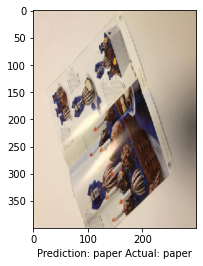

[[5.2819388e-07 6.6738480e-08 1.7776973e-04 1.6137468e-05 2.1198305e-07
  9.9980527e-01 9.4097636e-09]]


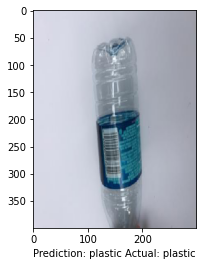

[[3.0277114e-04 3.0517463e-06 9.0053016e-01 2.7411133e-02 1.2925598e-05
  7.1570039e-02 1.6982674e-04]]


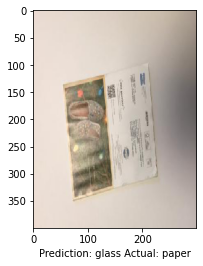

[[5.3417614e-05 7.1445834e-07 1.3726851e-01 8.5601681e-01 3.8146225e-03
  2.5864188e-03 2.5957546e-04]]


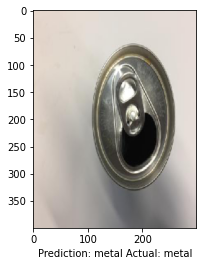

[[9.2897965e-29 0.0000000e+00 7.1985397e-35 1.5144847e-34 1.0000000e+00
  1.5900282e-32 0.0000000e+00]]


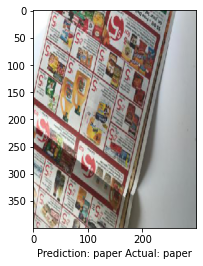

[[9.7049606e-01 6.5691886e-15 1.5870191e-05 8.9636650e-08 2.9481573e-02
  6.4295946e-06 1.4965936e-08]]


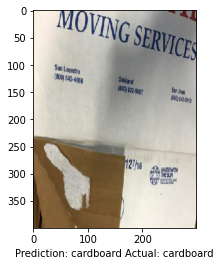

[[2.6726164e-04 3.7205118e-05 9.9485767e-01 2.1045676e-03 3.7871720e-04
  1.9151153e-03 4.3948495e-04]]


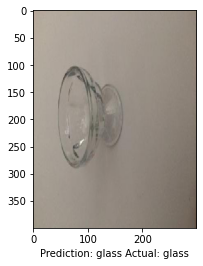

[[8.6790976e-07 1.0317429e-16 1.3059870e-06 1.8050999e-08 9.9996185e-01
  3.6005829e-05 9.0582489e-12]]


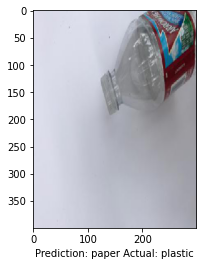

[[9.9999976e-01 9.2985491e-22 3.1650976e-10 1.1241602e-08 2.6871356e-07
  3.3742759e-11 3.2256881e-11]]


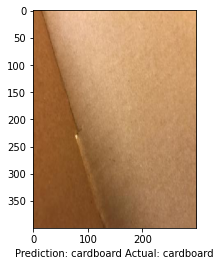

[[1.1800706e-04 4.9263114e-01 1.9124327e-03 4.9854484e-01 5.4512569e-05
  2.3663030e-03 4.3727709e-03]]


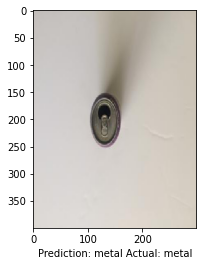

[[1.3535355e-05 4.4339046e-07 9.3756008e-01 1.1001622e-04 7.3416566e-05
  6.2237848e-02 4.6746300e-06]]


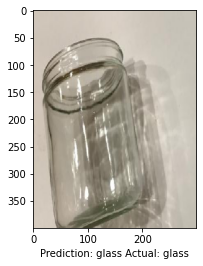

[[1.1771322e-02 2.6027538e-04 3.3043761e-02 3.3634558e-02 5.7379138e-03
  4.5838192e-01 4.5717022e-01]]


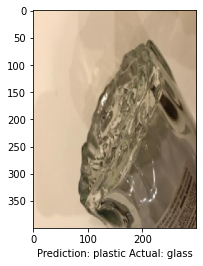

[[4.9518432e-05 1.2964731e-10 8.7108284e-01 2.7409067e-02 6.8365239e-02
  3.3093341e-02 3.9356021e-10]]


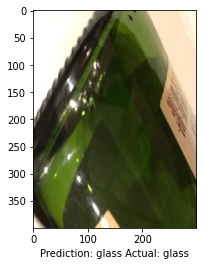

[[2.0022679e-03 8.1103992e-01 1.7780012e-02 7.1209088e-02 1.6136785e-03
  9.6255980e-02 9.8965342e-05]]


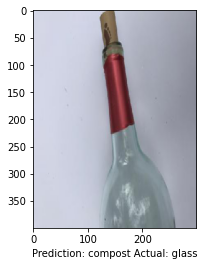

[[0.00319443 0.01206516 0.45678505 0.13194998 0.0054393  0.38800973
  0.00255637]]


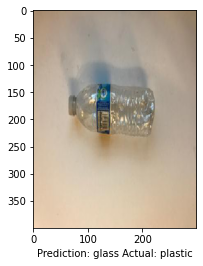

[[5.7205496e-05 8.2835221e-08 8.6964908e-05 3.9670899e-04 9.8278093e-01
  1.6672917e-02 5.3164608e-06]]


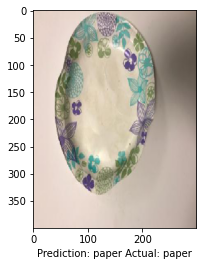

[[0.07341825 0.00479251 0.18537581 0.23866495 0.1611695  0.31900918
  0.01756979]]


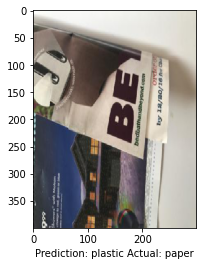

[[1.8856097e-03 2.4205094e-04 9.8267317e-01 5.8616339e-03 2.4906958e-03
  6.1049955e-03 7.4186490e-04]]


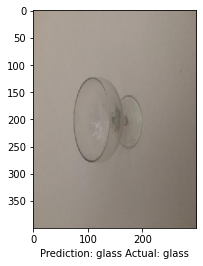

[[1.0331655e-03 7.0338533e-06 9.2554081e-04 4.2561926e-03 9.6675259e-01
  2.6426023e-02 5.9948739e-04]]


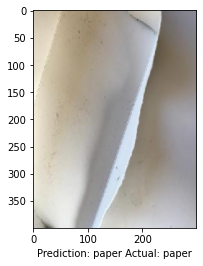

[[2.8218489e-04 5.8229558e-05 1.8039685e-02 1.6190442e-01 1.0719212e-03
  1.1806653e-01 7.0057708e-01]]


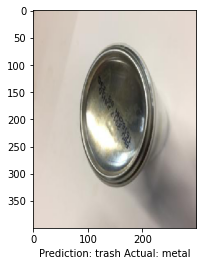

In [ ]:
test_generator.reset()
labels = ['cardboard', 'compost', 'glass', 'metal', 'paper', 'plastic', 'trash']

for i in range(0,20):
  x,y = test_generator.next()
  image = x[0]
  plt.imshow(image)
  y_prob = model.predict(x)
  print(y_prob)
  y_classes = y_prob.argmax(axis=-1)
  plt.xlabel("Prediction: " + labels[y_classes[0]] + " Actual: " + labels[y.argmax(axis=-1)[0]])
  plt.show()